<a href="https://colab.research.google.com/github/mmadyda/OpenCV/blob/master/OpenCV_FEATURE_MATCHING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

## Musi być ta wersja openCV

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

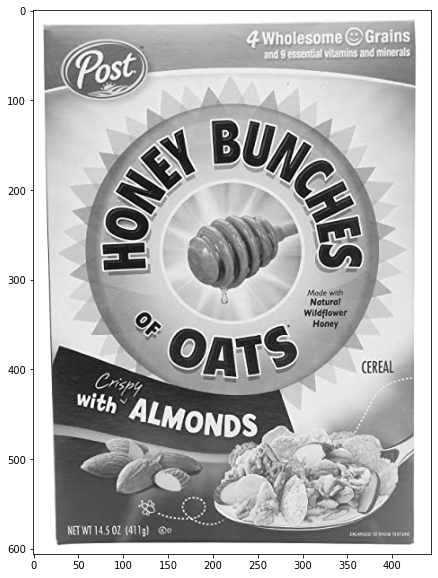

In [3]:
reeses = cv2.imread('wycinek.jpg',0)
display(reeses)

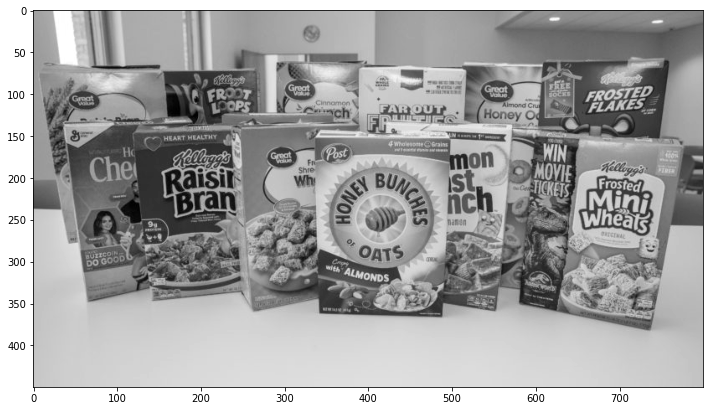

In [4]:
cereals = cv2.imread('flakes.jpg',0)
display(cereals)

In [0]:
orb = cv2.ORB_create()

In [0]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [0]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [0]:
matches = bf.match(des1, des2)

In [0]:
matches = sorted(matches, key = lambda x:x.distance)

In [0]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

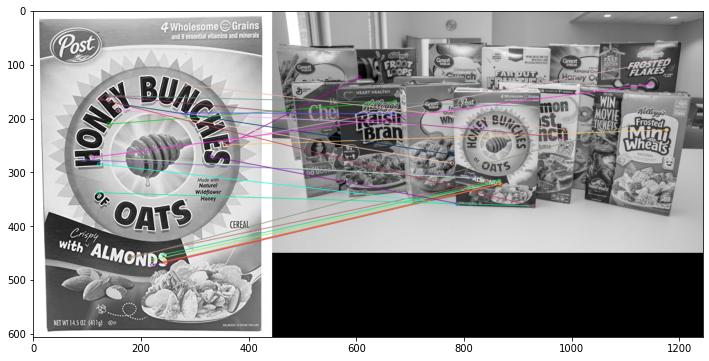

In [11]:
display(reeses_matches)

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [0]:
bf = cv2.BFMatcher()

In [0]:
matches = bf.knnMatch(des1, des2, k=2)

In [0]:
good = []

# Ratio test 
# mniejszy dystans lepsze porównanie
for match1, match2 in matches:
  if match1.distance < 0.75 * match2.distance:
    good.append([match1])

In [0]:
good

In [0]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good,None,flags=2)

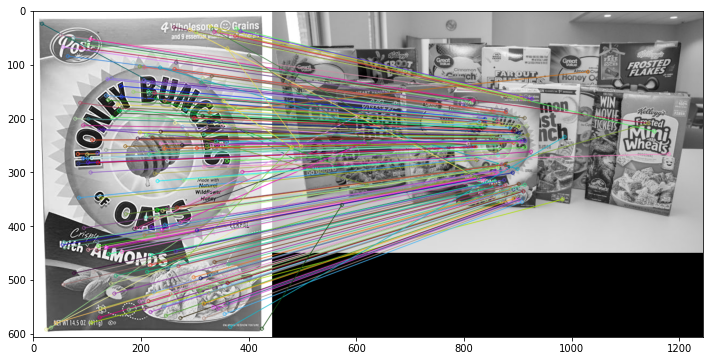

In [23]:
display(sift_matches)

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [0]:
#FLANN

FLANN_INDEX_KDTREE = 0
 
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [0]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [0]:
matches = flann.knnMatch(des1, des2, k=2)

In [0]:
matchesMask = [[0,0] for i in range(len(matches))]

In [0]:


for i, (match1, match2) in enumerate(matches):
  if match1.distance < 0.7*match2.distance:
    matchesMask[i] = [1,0]


In [0]:
draw_params = dict(matchColor =(0, 255,0),singlePointColor = (255,0,0), matchesMask=matchesMask,flags=0)

In [0]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

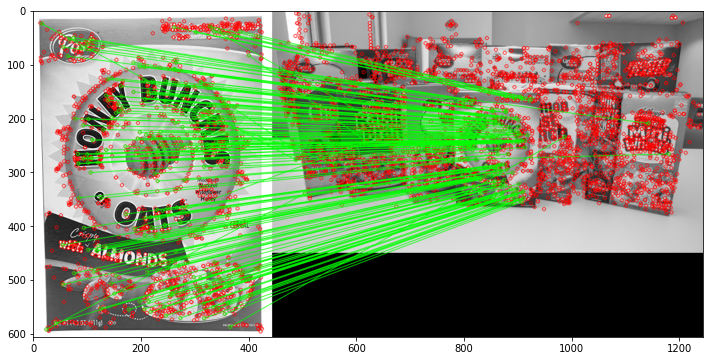

In [43]:
display(flann_matches)